# Baseline Model for Twitter Sentiment Analysis

This model will use SVM with tf/idf to classify the tweets.

It will reduce the dimensionality of the feature set by adjusting the minimum document frequency of words, in an attempt to get better results.

# Imports and Constants

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import LabelBinarizer
import evaluation_functions
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
import ast

In [2]:
DATA_FILE_PATH = 'C:\\Users\\Yostina\\Twitter\\'
TOKENIZED_DATA_FILE_NAME = 'tokenized_twitter_data.csv'
pd.set_option('display.max_colwidth', None)
RANDOM_STATE = 42

# Load Data

In [3]:
df = pd.read_csv(DATA_FILE_PATH + TOKENIZED_DATA_FILE_NAME)

In [4]:
df.head()

,tweet_text,ebc_category,is_there_an_emotion_directed_at_a_brand_or_product,tokens
0,,EBC,Positive emotion,[]
1,excited to meet the samsungmobileus at sxsw so i can show them my sprint galaxy s still running android fail,EBC,Positive emotion,"['excited', 'to', 'meet', 'the', 'samsungmobileus', 'at', 'sxsw', 'so', 'i', 'can', 'show', 'them', 'my', 'sprint', 'galaxy', 's', 'still', 'running', 'android', 'fail']"
2,find start impromptu parties at sxsw with hurricaneparty http bitly gvlrin i can't wait til the android app comes out #,FM,Positive emotion,"['find', 'start', 'impromptu', 'parties', 'at', 'sxsw', 'with', 'hurricaneparty', 'http', 'bitly', 'gvlrin', 'i', ""can't"", 'wait', 'til', 'the', 'android', 'app', 'comes', 'out']"
3,foursquare ups the game just in time for sxsw http jmp grnpk still prefer gowalla by far best looking android app to date,NR,Positive emotion,"['foursquare', 'ups', 'the', 'game', 'just', 'in', 'time', 'for', 'sxsw', 'http', 'jmp', 'grnpk', 'still', 'prefer', 'gowalla', 'by', 'far', 'best', 'looking', 'android', 'app', 'to', 'date']"
4,gotta love this sxsw google calendar featuring top parties show cases to check out rt hamsandwich via ischafer = gt;http bitly axzwxb,FM,Positive emotion,"['gotta', 'love', 'this', 'sxsw', 'google', 'calendar', 'featuring', 'top', 'parties', 'show', 'cases', 'to', 'check', 'out', 'rt', 'hamsandwich', 'via', 'ischafer', 'gt', 'http', 'bitly', 'axzwxb']"


In [5]:
# convert list of strings represented as a string to a list of strings
df.tokens = df.tokens.map(ast.literal_eval)

In [6]:
data = df[['tokens', 'is_there_an_emotion_directed_at_a_brand_or_product']]

In [7]:
data.head()

,tokens,is_there_an_emotion_directed_at_a_brand_or_product
0,[],Positive emotion
1,"[excited, to, meet, the, samsungmobileus, at, sxsw, so, i, can, show, them, my, sprint, galaxy, s, still, running, android, fail]",Positive emotion
2,"[find, start, impromptu, parties, at, sxsw, with, hurricaneparty, http, bitly, gvlrin, i, can't, wait, til, the, android, app, comes, out]",Positive emotion
3,"[foursquare, ups, the, game, just, in, time, for, sxsw, http, jmp, grnpk, still, prefer, gowalla, by, far, best, looking, android, app, to, date]",Positive emotion
4,"[gotta, love, this, sxsw, google, calendar, featuring, top, parties, show, cases, to, check, out, rt, hamsandwich, via, ischafer, gt, http, bitly, axzwxb]",Positive emotion


# Split Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data['tokens'], 
                                                    data['is_there_an_emotion_directed_at_a_brand_or_product'],
                                                   test_size = 0.2,
                                                   random_state = RANDOM_STATE,
                                                   stratify = data['is_there_an_emotion_directed_at_a_brand_or_product'])

In [9]:
X_train.shape

(16,)

In [10]:
X_test.shape

(4,)

# Encode Labels

In [11]:
le = LabelEncoder()

In [12]:
y_train_enc = le.fit_transform(y_train)

In [13]:
y_test_enc = le.transform(y_test)

# Evaluate Adjustments to Minimum Document Frequency

In [14]:
def passthrough(doc):
    """passthrough function for use in the pipeline because the text is already tokenized"""
    return doc

In [15]:
def train_and_eval_model(min_df):
    """
    Train and Evaluate and Bag of Words Representation with a SVM
    classifier with a specified minimum document frequency.
    """
    
    pipeline = Pipeline([
    ('bow',CountVectorizer(min_df=min_df,
                           preprocessor=passthrough, 
                           tokenizer=passthrough)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SGDClassifier(loss='hinge', 
                                 penalty='l2',
                                 alpha=1e-3, 
                                 random_state=RANDOM_STATE,
                                 max_iter=5, 
                                 tol=None)),
    ])
    
    pipeline.fit(X_train,y_train_enc)
    
    print(f'MINIMUM DOCUMENT FREQUENCY = {min_df}')
    print('')
    
    evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_train, 
                                                                 y_train_enc, 
                                                                 le.classes_, 
                                                                 'Training')
    
    evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_test, 
                                                                 y_test_enc, 
                                                                 le.classes_,
                                                                 'Test')
    
    train_accuracy = accuracy_score(y_train_enc, pipeline.predict(X_train))
    
    test_accuracy = accuracy_score(y_test_enc, pipeline.predict(X_test))
    
    ave_macro_recall = recall_score(y_test_enc, pipeline.predict(X_test), average='macro')
    recall_scores = recall_score(y_test_enc, pipeline.predict(X_test), average=None)
    
    test_results = np.append(np.array([min_df, train_accuracy, test_accuracy, ave_macro_recall]),
                             recall_scores)
   
    return test_results
    

MINIMUM DOCUMENT FREQUENCY = 1

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       1.00      1.00      1.00         1
No emotion toward brand or product       1.00      1.00      1.00         2
                  Positive emotion       1.00      1.00      1.00        13

                          accuracy                           1.00        16
                         macro avg       1.00      1.00      1.00        16
                      weighted avg       1.00      1.00      1.00        16



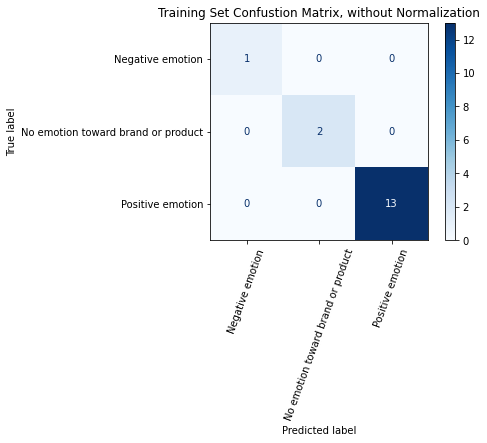

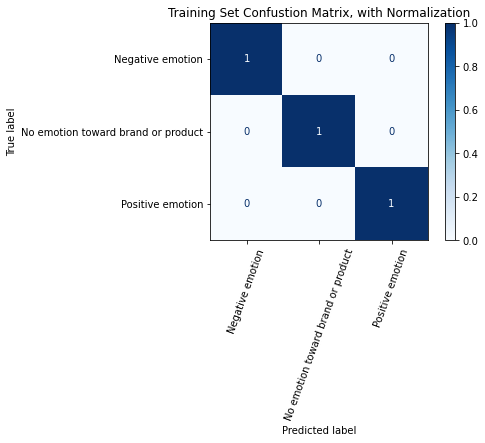

Classification Report for Test Set


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

In [16]:
metrics_summary = []

for min_df in range(1,11):
    test_scores = train_and_eval_model(min_df)
    metrics_summary.append(test_scores)

In [ ]:
metrics_summary_df = pd.DataFrame(metrics_summary, 
                                  columns=['min doc freq',
                                           'train accuracy',
                                           'test accuracy',
                                           'macro recall',
                                          'neg recall',
                                          'neutral recall',
                                          'pos recall'])

metrics_summary_df

In [ ]:
metrics = train_and_eval_model(min_df=5)

# Summary

This model is only good, and it is very good, at correctly classifying actual members of the majority class as from that class.  It has very low recall values for the two minority classes, negative and positive.

Looking at the confusion matrix, it is classifying almost all the instances as the majority class, neutral.